Notebook done in Google Colab, comment out the second cell if not using google colab

In [65]:
import pandas as pd
import numpy as np 
import re
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
from google.colab import files
uploaded = files.upload()

Saving pone.0212445.s004.xlsx to pone.0212445.s004 (5).xlsx


In [29]:
raw_df = pd.read_excel('pone.0212445.s004.xlsx',skiprows=[0]) 

In [30]:
df = raw_df

In [31]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [32]:
df.loc[df['Estimate'] == 'Survey', 'NoPLHIV'].sum()

6409903

What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [33]:
df['District'].value_counts()

Buffalo City                 2
Ngaka Modiri Molema          2
Ugu                          2
Nelson Mandela Bay Metro     2
Bojanala Platinum            2
Amajuba                      2
Ehlanzeni                    2
City of Johannesburg         2
Nkangala                     2
iLembe                       2
City of Tshwane              2
Eden                         2
Mangaung                     2
Xhariep                      2
Gert Sibande                 2
Zululand                     2
uMzinyathi                   2
uMkhanyakude                 2
eThekwini                    2
City of Cape Town            2
Sedibeng                     2
Thabo Mofutsanyana           2
Siyanda                      2
West Rand                    2
Chris Hani                   2
Dr Kenneth Kaunda            2
uThukela                     2
John Taolo Gaetsewe          2
uMgungundlovu                2
Waterberg                    2
Fezile Dabi                  2
Central Karoo                2
Mopani  

In [34]:
X_sum = df.loc[df['District'] == 'Xhariep', 'NoPLHIV'].sum()
X_sum
X_mean = X_sum//2
print("The mean is : " + str(X_mean))

The mean is : 12247


Add a column and populate it with the number of people not living with HIV for each row.

In [35]:
Prevalence_list = df['Prevalence_%'].tolist()
NoPLHIV_list = df['NoPLHIV'].tolist()

Total = [(i / j)*100 for i, j in zip(NoPLHIV_list, Prevalence_list)]
Total


[753213.2352941177,
 753209.8792607372,
 3860596.153846154,
 3860587.2840686925,
 418592.5925925926,
 418607.23580113973,
 457000.0,
 456993.1747644747,
 898945.4545454546,
 898952.1122232694,
 803139.8601398602,
 803139.976418116,
 352953.2710280374,
 352960.4873682088,
 1358915.254237288,
 1358916.1524249641,
 141891.56626506025,
 141893.35351335348,
 610187.1921182266,
 610189.773536605,
 723308.1761006289,
 723308.7285928508,
 808052.6315789474,
 808044.647082605,
 506111.1111111111,
 506113.4874722062,
 733225.641025641,
 733229.3779527526,
 1052728.5714285714,
 1052729.5286235043,
 682797.6878612716,
 682796.5118245058,
 514214.2857142858,
 514217.9851657415,
 507469.1358024692,
 507467.4827935595,
 824091.3461538461,
 824089.6506089733,
 638007.4074074074,
 638010.3813358435,
 937791.9075144507,
 937791.8369163005,
 630467.7419354838,
 630463.7955380593,
 272624.0,
 272626.33497830486,
 1056177.6649746192,
 1056176.8639799163,
 1357741.9354838708,
 1357747.7775341696,
 1714048.7

In [36]:
NoPNLWHIV = []
for (i,j) in zip(Total, NoPLHIV_list):
    NoPNLWHIV.append(i-j)

In [37]:

round_NoPNLWHIV = [round(i) for i in NoPNLWHIV]

In [38]:
round_NoPNLWHIV

[650776,
 651517,
 3659845,
 3628178,
 407291,
 401493,
 422268,
 416264,
 800061,
 792169,
 688291,
 690050,
 315187,
 312342,
 1198563,
 1191534,
 130115,
 129175,
 486319,
 502624,
 608302,
 609860,
 777347,
 763392,
 460561,
 455346,
 590247,
 590915,
 831656,
 842824,
 564674,
 567248,
 420627,
 421157,
 425259,
 426457,
 652680,
 656100,
 551876,
 546748,
 775554,
 777507,
 552290,
 536221,
 255585,
 252481,
 848111,
 849120,
 1231472,
 1225934,
 1432945,
 1442870,
 683681,
 684487,
 1257419,
 1225194,
 1148334,
 1141556,
 637106,
 635127,
 1352567,
 1352746,
 734955,
 742395,
 420568,
 419887,
 560646,
 554681,
 604892,
 607545,
 717625,
 758934,
 372333,
 380977,
 717393,
 716612,
 210620,
 212493,
 1029497,
 1008546,
 789166,
 754391,
 53424,
 62638,
 115147,
 116556,
 180519,
 179155,
 230488,
 229598,
 332315,
 338183,
 2769123,
 2789189,
 2961897,
 2960585,
 4127739,
 4128890,
 1022147,
 1008301,
 1076746,
 1067889,
 2727866,
 2748726]

In [39]:
df["NoPNLWHIV"] = round_NoPNLWHIV

In [40]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLWHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,650776
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,651517
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3659845
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3628178
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,407291


What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)?

In [41]:
df_filter = raw_df

In [42]:
_Filter = df_filter["District"].str.contains('City',regex=False) | df_filter["District"].str.contains('Metro',regex=False)
_Filter.value_counts()

False    94
True     10
Name: District, dtype: int64

In [43]:
df_filter.where(_Filter, inplace = True)

In [44]:
df_filter = df_filter.dropna()

In [45]:
df_filter['District'].value_counts()

City of Johannesburg        2
Buffalo City                2
City of Cape Town           2
City of Tshwane             2
Nelson Mandela Bay Metro    2
Name: District, dtype: int64

In [46]:
Total_cities =  df_filter['NoPLHIV'].sum()
print("The Total Number of  NoPLHIV in all the cities (districts with “city” or “metro” in the name) is:  " + str(Total_cities))

The Total Number of  NoPLHIV in all the cities (districts with “city” or “metro” in the name) is:  2572733.0


Remove all the special/non-alphabetic characters from the dataframe column names. Print the resultant field names output. 


In [48]:
df.columns.values

array(['District', 'Code', 'Estimate', 'Prevalence_%', 'Prevalence_LCL',
       'Prevalence_UCL', 'NoPLHIV', 'NoPLHIV_LCL', 'NoPLHIV_UCL',
       'NoPNLWHIV'], dtype=object)

In [49]:
clean_text = []

for i in range(0, len(df.columns.values)):
    clean_text.append(re.sub("_", ' ', df.columns.values[i]))
    

In [50]:
clean_text

['District',
 'Code',
 'Estimate',
 'Prevalence %',
 'Prevalence LCL',
 'Prevalence UCL',
 'NoPLHIV',
 'NoPLHIV LCL',
 'NoPLHIV UCL',
 'NoPNLWHIV']

In [51]:
df.columns = clean_text

In [52]:
df.head()

,District,Code,Estimate,Prevalence %,Prevalence LCL,Prevalence UCL,NoPLHIV,NoPLHIV LCL,NoPLHIV UCL,NoPNLWHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437.0,77340.0,127534.0,650776.0
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693.0,83092.0,123691.0,651517.0
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751.0,117517.0,283985.0,3659845.0
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409.0,167359.0,320548.0,3628178.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph. 


In [53]:
df.head()

,District,Code,Estimate,Prevalence %,Prevalence LCL,Prevalence UCL,NoPLHIV,NoPLHIV LCL,NoPLHIV UCL,NoPNLWHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437.0,77340.0,127534.0,650776.0
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693.0,83092.0,123691.0,651517.0
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751.0,117517.0,283985.0,3659845.0
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409.0,167359.0,320548.0,3628178.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_filter2 = pd.read_excel('pone.0212445.s004.xlsx',skiprows=[0]) 

In [55]:
_Filter2 = df_filter2["District"].str.endswith('i')
_Filter2.value_counts()

False    86
True     18
Name: District, dtype: int64

In [56]:
df_filter2.where(_Filter2, inplace = True)

In [57]:
df_filter2['Estimate'].value_counts()

Fay-Heriott    9
Survey         9
Name: Estimate, dtype: int64

In [58]:
fay_filter = df_filter2['Estimate'] == "Fay-Heriott"
df_filter2.where(fay_filter, inplace = True)

In [59]:
df_filter2['Estimate'].value_counts()

Fay-Heriott    9
Name: Estimate, dtype: int64

In [60]:
df_filter2

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_filter2 = df_filter2.dropna()

In [62]:
df_filter2

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090.0,89801.0,141224.0
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618.0,32796.0,50013.0
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767.0,39534.0,64748.0
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061.0,86620.0,99868.0
51,Ehlanzeni,DC32,Fay-Heriott,15.820960,12.012425,20.554906,271179.0,205899.0,352321.0
53,Mopani,DC33,Fay-Heriott,11.294971,7.921185,15.858238,87157.0,61123.0,122369.0
65,Dr Ruth Segomotsi Mompati,DC39,Fay-Heriott,11.045235,8.164344,14.779090,52136.0,38538.0,69761.0
93,Ekurhuleni,EKU,Fay-Heriott,13.678908,10.647292,17.405572,441990.0,344033.0,562405.0
95,eThekwini,ETH,Fay-Heriott,14.537772,11.791222,17.795017,503618.0,408472.0,616456.0


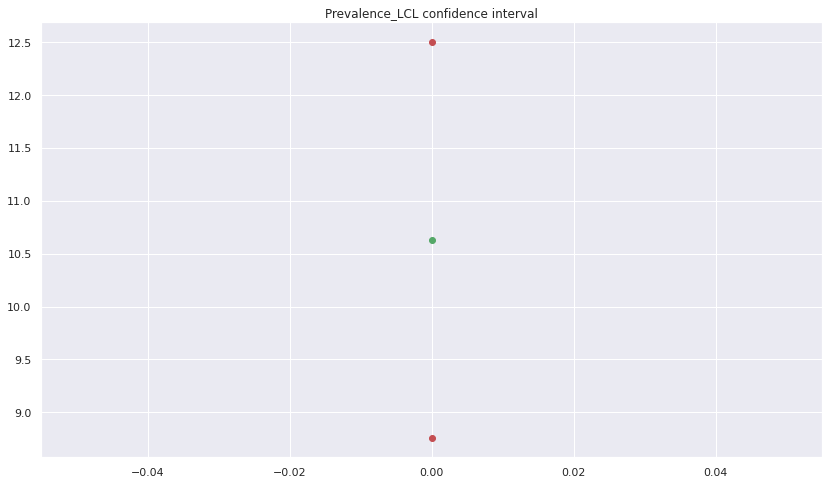

In [63]:
sample_mean = mean(df_filter2.Prevalence_LCL)
s_95ci = 1.96 * sem(df_filter2.Prevalence_LCL)
sample_min = sample_mean - s_95ci
sample_max = sample_mean + s_95ci


figure(figsize=(14, 8))
plt.title('Prevalence_LCL confidence interval')
plt.plot(sample_mean, "go")
plt.plot(sample_min, "ro")
plt.plot(sample_max, "ro")
plt.show()



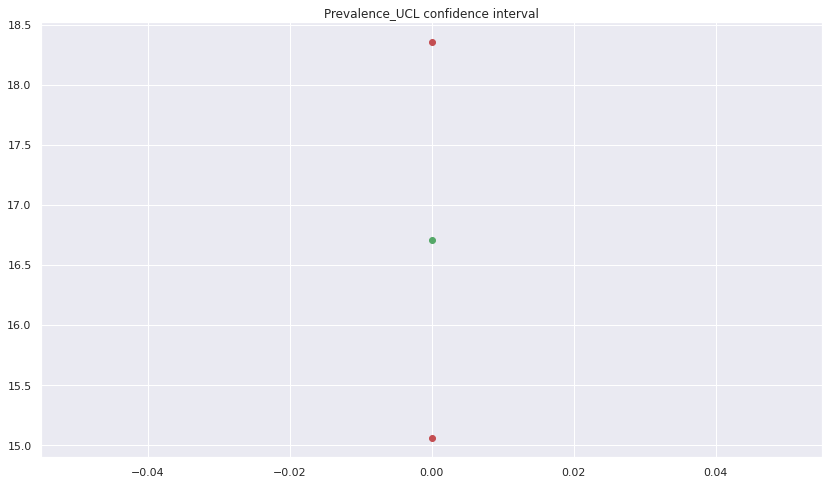

In [64]:
sample_mean = mean(df_filter2.Prevalence_UCL)
s_95ci = 1.96 * sem(df_filter2.Prevalence_UCL)
sample_min = sample_mean - s_95ci
sample_max = sample_mean + s_95ci


figure(figsize=(14, 8))
plt.title('Prevalence_UCL confidence interval')
plt.plot(sample_mean, "go")
plt.plot(sample_min, "ro")
plt.plot(sample_max, "ro")
plt.show()